In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


In [ ]:
train_data= pd.read_csv("/content/train.csv", index_col="id")
train_data.head(5)

,Unnamed: 0,B1,B10,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9,isArgania
id,,,,,,,,,,,,,,,
1669,1668,1506.0,17.0,3428.0,2411.0,1402.0,1471.0,1919.0,1861.0,2285.0,2632.0,2666.0,3014.0,716.0,1.0
1398,1397,1711.0,15.0,2803.0,2171.0,1473.0,1487.0,1677.0,2056.0,2456.0,2751.0,2461.0,3010.0,669.0,0.0
1338,1337,1564.0,15.0,3758.0,2683.0,1445.0,1519.0,2035.0,2283.0,2711.0,3022.0,2989.0,3420.0,784.0,0.0
916,915,1524.0,13.0,3747.0,2445.0,1363.0,1364.0,1899.0,1956.0,2294.0,2626.0,2708.0,3118.0,750.0,1.0
687,686,1502.0,13.0,1674.0,892.0,1168.0,1045.0,924.0,1244.0,2268.0,2735.0,2368.0,3032.0,832.0,0.0


In [ ]:
train_data.drop("Unnamed: 0", axis=1,inplace=True)

In [ ]:
train_data.describe()

,B1,B10,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9,isArgania
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,1649.279446,15.948422,3222.066975,2335.817552,1472.685912,1494.292533,1817.821401,1991.877598,2453.019246,2758.510393,2674.936105,3072.674365,725.579677,0.545804
std,307.002793,1.638224,624.812238,595.394901,333.934307,359.183916,477.507267,416.725493,455.152619,513.909361,483.427690,535.500986,100.524114,0.498089
min,1192.000000,8.000000,181.000000,139.000000,947.000000,789.000000,485.000000,425.000000,370.000000,363.000000,310.000000,321.000000,119.000000,0.000000
25%,1501.000000,15.000000,2883.000000,2045.000000,1303.000000,1280.500000,1546.000000,1755.000000,2176.000000,2465.000000,2414.000000,2805.000000,675.000000,0.000000
50%,1559.000000,16.000000,3387.000000,2413.000000,1371.000000,1384.000000,1766.000000,1930.000000,2356.000000,2656.000000,2606.000000,2996.000000,712.000000,1.000000
75%,1669.500000,17.000000,3591.000000,2667.500000,1529.000000,1604.000000,2056.500000,2166.000000,2674.500000,2981.000000,2905.000000,3295.000000,767.000000,1.000000
max,4014.000000,22.000000,5688.000000,4411.000000,3950.000000,3831.000000,4508.000000,4602.000000,5040.000000,5387.000000,5216.000000,5699.000000,1236.000000,1.000000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 1669 to 46
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   B1         1299 non-null   float64
 1   B10        1299 non-null   float64
 2   B11        1299 non-null   float64
 3   B12        1299 non-null   float64
 4   B2         1299 non-null   float64
 5   B3         1299 non-null   float64
 6   B4         1299 non-null   float64
 7   B5         1299 non-null   float64
 8   B6         1299 non-null   float64
 9   B7         1299 non-null   float64
 10  B8         1299 non-null   float64
 11  B8A        1299 non-null   float64
 12  B9         1299 non-null   float64
 13  isArgania  1299 non-null   float64
dtypes: float64(14)
memory usage: 152.2 KB


In [ ]:
train_data["isArgania"].value_counts()

1.0    709
0.0    590
Name: isArgania, dtype: int64

In [ ]:
train_data_0 = train_data[train_data["isArgania"]==0.0]
train_data_1 = train_data[train_data["isArgania"]==1.0]

In [ ]:
train_data_1_s = train_data_1.sample(590)

In [ ]:
train_balanced = pd.concat([train_data_0,train_data_1_s],axis=0)

In [ ]:
train_balanced=train_balanced.sample(len(train_balanced))

In [ ]:
train_balanced.head(10)

,B1,B10,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9,isArgania
id,,,,,,,,,,,,,,
317,1765.0,18.0,3229.0,2337.0,1655.0,1778.0,2233.0,2231.0,3163.0,3555.0,3435.0,3883.0,797.0,0.0
1544,1901.0,15.0,2836.0,2327.0,1831.0,1787.0,2079.0,2182.0,2318.0,2505.0,2215.0,2598.0,653.0,0.0
1909,1534.0,19.0,3677.0,2903.0,1452.0,1464.0,2006.0,2038.0,2384.0,2656.0,2621.0,3017.0,719.0,1.0
461,1542.0,18.0,3764.0,3116.0,1357.0,1412.0,1932.0,2089.0,2400.0,2694.0,2548.0,2984.0,701.0,1.0
1135,1548.0,14.0,3412.0,2216.0,1325.0,1291.0,1716.0,1760.0,2018.0,2330.0,2397.0,2721.0,671.0,1.0
98,1523.0,13.0,2509.0,1448.0,1291.0,1317.0,1239.0,1658.0,3001.0,3533.0,3415.0,3921.0,864.0,0.0
205,1513.0,17.0,3602.0,2347.0,1340.0,1334.0,1768.0,1915.0,2223.0,2553.0,2544.0,3017.0,711.0,1.0
1160,1611.0,15.0,3304.0,2448.0,1357.0,1360.0,1719.0,1925.0,2200.0,2519.0,2311.0,2797.0,637.0,1.0
436,1767.0,17.0,3541.0,2798.0,1719.0,1852.0,2391.0,2473.0,2949.0,3245.0,3045.0,3523.0,741.0,0.0


In [ ]:
train_balanced

,B1,B10,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,B9,isArgania
id,,,,,,,,,,,,,,
317,1765.0,18.0,3229.0,2337.0,1655.0,1778.0,2233.0,2231.0,3163.0,3555.0,3435.0,3883.0,797.0,0.0
1544,1901.0,15.0,2836.0,2327.0,1831.0,1787.0,2079.0,2182.0,2318.0,2505.0,2215.0,2598.0,653.0,0.0
1909,1534.0,19.0,3677.0,2903.0,1452.0,1464.0,2006.0,2038.0,2384.0,2656.0,2621.0,3017.0,719.0,1.0
461,1542.0,18.0,3764.0,3116.0,1357.0,1412.0,1932.0,2089.0,2400.0,2694.0,2548.0,2984.0,701.0,1.0
1135,1548.0,14.0,3412.0,2216.0,1325.0,1291.0,1716.0,1760.0,2018.0,2330.0,2397.0,2721.0,671.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1581.0,17.0,3322.0,2415.0,1550.0,1696.0,2255.0,2416.0,2696.0,2970.0,2911.0,3191.0,932.0,1.0
741,1883.0,17.0,4008.0,3191.0,1780.0,1923.0,2553.0,2606.0,2871.0,3149.0,2970.0,3363.0,759.0,0.0
1659,1334.0,15.0,2509.0,1764.0,1134.0,1131.0,1168.0,1488.0,1933.0,2166.0,2115.0,2435.0,758.0,0.0


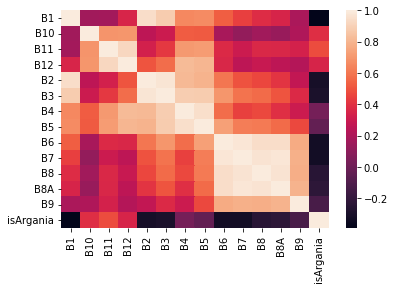

In [ ]:
plt.figure()

sns.heatmap(train_balanced.corr())

In [ ]:
train_balanced.columns

Index(['B1', 'B10', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8',
       'B8A', 'B9', 'isArgania'],
      dtype='object')

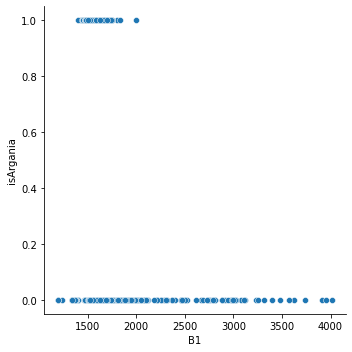

In [ ]:
sns.relplot(data=train_balanced, y="isArgania", x="B1")


In [ ]:
# cpt=1
# plt.figure(figsize=(15,10))
# for c in train_balanced.columns:
#     plt.subplot(13,1,cpt)
#     sns.relplot(data=train_balanced, y="isArgania", x=c)
#     plt.show()
#     cpt+=1



In [ ]:

from sklearn.feature_selection import mutual_info_classif

X = train_balanced.copy()
y = X.pop("isArgania")
m = mutual_info_classif(X,y)
m

array([0.34490744, 0.12734374, 0.29054661, 0.2775813 , 0.18800901,
       0.1356224 , 0.18909236, 0.16059184, 0.14230026, 0.18900576,
       0.13263148, 0.15667821, 0.19591975])

Text(0.5, 1.0, 'Mutual information between predictors and target')

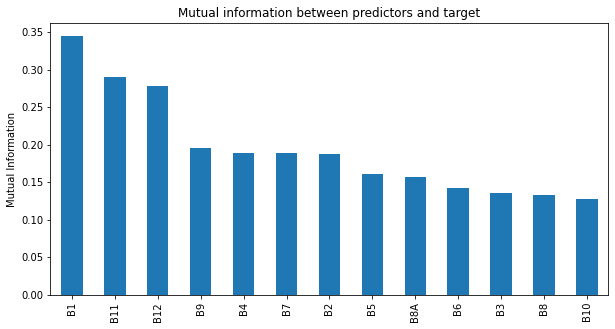

In [ ]:
m = pd.Series(m)
m.index = X.columns
m.sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")

In [ ]:
#!pip install pycaret
#!pip install -U scikit-learn==0.23.2

In [ ]:
import sklearn
sklearn.__version__
#!pip install numpy==1.20.0

'0.23.2'

In [ ]:
import pycaret

In [ ]:
from pycaret.classification import setup
exp_name = setup(data = train_balanced,
                 target = 'isArgania',
                 train_size=0.7,
                 feature_selection=True,
                 preprocess=False,
                 remove_outliers=True,
                 use_gpu=True)

,Description,Value
0,session_id,352
1,Target,isArgania
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(1180, 14)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,0
8,Transformed Train Set,"(825, 13)"
9,Transformed Test Set,"(355, 13)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='isArgania',
                                      time_features=[]))],
         verbose=False)
INFO:logs:setup() succesfully completed......................................


In [ ]:
from pycaret.classification import models
models()

INFO:logs:gpu_param set to True


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
from pycaret.classification import compare_models
best_model = compare_models(exclude=["lightgbm"])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9334,0.9784,0.9506,0.9186,0.9333,0.8669,0.8694,0.694
et,Extra Trees Classifier,0.9334,0.9822,0.9531,0.9165,0.9335,0.8669,0.8694,0.458
gbc,Gradient Boosting Classifier,0.9322,0.9750,0.9506,0.9172,0.9325,0.8645,0.8673,0.261
ada,Ada Boost Classifier,0.9225,0.9664,0.9356,0.9107,0.9222,0.8450,0.8468,0.212
knn,K Neighbors Classifier,0.9200,0.9579,0.9453,0.8991,0.9205,0.8401,0.8436,0.123
lr,Logistic Regression,0.9128,0.9571,0.9285,0.8994,0.9130,0.8258,0.8275,0.214
qda,Quadratic Discriminant Analysis,0.9128,0.9581,0.9159,0.9090,0.9115,0.8255,0.8272,0.016
dt,Decision Tree Classifier,0.8946,0.8944,0.8837,0.9017,0.8913,0.7891,0.7914,0.015
ridge,Ridge Classifier,0.8934,0.0000,0.9358,0.8628,0.8966,0.7871,0.7922,0.012
lda,Linear Discriminant Analysis,0.8934,0.9474,0.9358,0.8628,0.8966,0.7871,0.7922,0.016


INFO:logs:create_model_container: 27
INFO:logs:master_model_container: 27
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=352, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=352, verbose=0,
                       warm_start=False)

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbmc= LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=352, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y,train_size=0.7)

In [ ]:
lgbmc.fit(X,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=352, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
test_data =pd.read_csv("/content/test.csv",index_col="id")
test_data.drop("Unnamed: 0", axis=1,inplace=True)
test_data.head(10)

In [ ]:
test_data["isArgania"]=lgbmc.predict(test_data)
test_data["isArgania"]=test_data["isArgania"].astype("int32")

In [ ]:
test_data[test_data["isArgania"]==1] = 10
test_data[test_data["isArgania"]==0] = 1
test_data[test_data["isArgania"]==10] = 0

In [ ]:
test_data["isArgania"][120]

1

In [ ]:
sample_submission = test_data["isArgania"]
sample_submission_df = pd.DataFrame(sample_submission)
sample_submission_df.to_csv("sample_submission.csv")

In [ ]:
y_pred = lgbmc.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test,y_pred)


0.956989247311828